In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
evaluation = pd.read_csv('../evaluation/movielens1M/movielens1M_10.csv', sep=',', header = 0,encoding='latin-1')

In [4]:
evaluation.head()

,algorithm,dataset,recall,precision,fallout,antiprecision,recall_c,precision_c,fallout_c,antiprecision_c,cutoff
0,mostpopular,movielens1M,0.085909,0.145203,0.034068,0.036089,0.602498,0.624756,0.469515,0.261044,10.0


In [6]:
evaluation = evaluation.loc[~evaluation['algorithm'].isin(['optimaltrueprecision','optimaltruefdr','optimaltrueprecisionrestricted','optimaltruefdrrestricted'])]


In [7]:
evaluation.head()

,algorithm,dataset,recall,precision,fallout,antiprecision,recall_c,precision_c,fallout_c,antiprecision_c,cutoff
0,mostpopular,movielens1M,0.085909,0.145203,0.034068,0.036089,0.602498,0.624756,0.469515,0.261044,10.0


In [10]:
# Standard plotly imports
#import chart_studio.plotly as py
import plotly.graph_objs as go
#from plotly.offline import iplot, 
from plotly.offline import init_notebook_mode

In [11]:
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

## Condensed Rankings

In [13]:
evaluation.iplot(
    x='antiprecision_c',
    y='precision_c',
    # Specify the category
    categories='algorithm',
    xTitle='antiP@10',
    yTitle='P@10',
    title='Condensed Rankings (Movielens1M)')

In [14]:
evaluation.iplot(
    x='fallout_c',
    y='recall_c',
    # Specify the category
    categories='algorithm',
    xTitle='Fallout@10',
    yTitle='Recall@10',
    title='Condensed Rankings (Movielens1M)')

In [ ]:
evaluation[['antiprecision_c','precision_c']].corr(method='kendall')

In [ ]:
evaluation.iplot(
    x='antiprecision',
    y='precision',
    # Specify the category
    categories='algorithm',
    xTitle='antiP@10',
    yTitle='P@10',
    title='Condensed Rankings (Movielens1M)')

In [ ]:
x_true[['ndcg','ndcl']].corr(method='kendall')

AttributeError: 'numpy.ndarray' object has no attribute 'text'

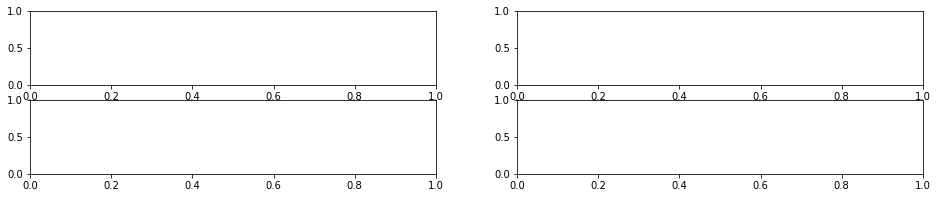

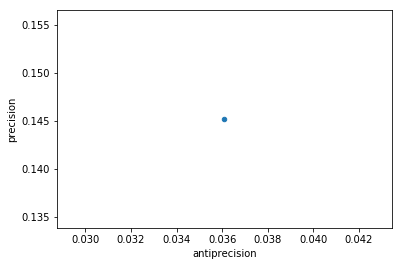

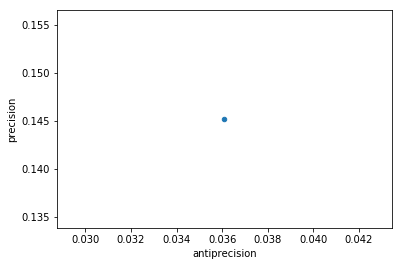

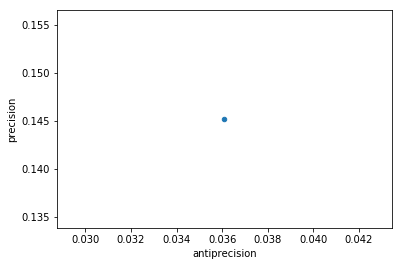

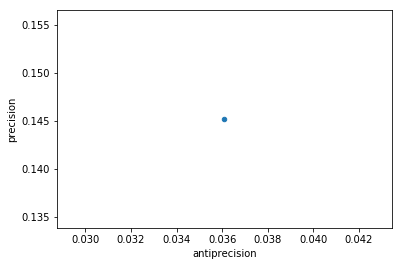

In [17]:
fig, ax = plt.subplots(2, 2, figsize=(16, 3))

evaluation.plot(x='antiprecision', y='precision', kind='scatter')
evaluation.plot(x='antiprecision', y='precision', kind='scatter')
evaluation.plot(x='antiprecision', y='precision', kind='scatter')
evaluation.plot(x='antiprecision', y='precision', kind='scatter')

#handles, labels = ax[3].get_legend_handles_labels()
#don't put errors shaded area into legend
#handles = [hdl for hdl in handles if not isinstance(hdl, mpl.collections.PolyCollection)]
#labels = [lbl for lbl in labels if not isinstance(lbl, mpl.collections.PolyCollection)]

#lgnd = fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1,0.8))

txt = ax[0].text(-0.07, 0.087, 'A', fontsize=20)
plt.tight_layout()